In [24]:
import matplotlib.pyplot as plt

In [25]:
def get_uniform_dist(n):
    return [1./n] * n

## Sensor model

In [26]:
p = get_uniform_dist(5)
world=['green', 'red', 'red', 'green', 'green']
Z = 'red'
pHit = 0.6
pMiss = 0.2

def sense(p, Z):
    q = []
    for i in range(len(p)):
        hit = (world[i] == Z)
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    # normalize
    total = sum(q)
    q = [i/total for i in q]
    return q
q = sense(p, Z)

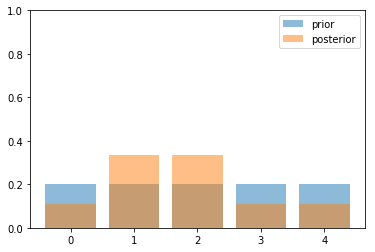

In [27]:
fig, ax = plt.subplots(1)
ax.bar(range(len(p)), p, alpha=0.5)
ax.bar(range(len(p)), q, alpha=0.5)
ymin, ymax = 0, 1
ax.set_ylim(ymin, ymax)
ax.legend(['prior', 'posterior']);

## Inaccurate Motion Model

In [28]:
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

In [29]:
def move(p, U):
    q = []
    for i in range(len(p)):
        q.append(p[(i-U+1) % len(p)] * pUndershoot + p[(i-U) % len(p)] * pExact + p[(i-U-1) % len(p)] * pUndershoot)
    return q
        
move([0, 1, 0, 0, 0], 1)

[0.0, 0.1, 0.8, 0.1, 0.0]

## Combine Sense and Move

In [38]:
def plot_distribution(p, title):
    fig, ax = plt.subplots(1)
    ax.bar(range(len(p)), p)
    ax.set_ylim(0, 1)
    plt.title(title)
    plt.show()

In [47]:
from math import log
def calc_entropy(p):
    return sum([-1*x*log(x) for x in p])

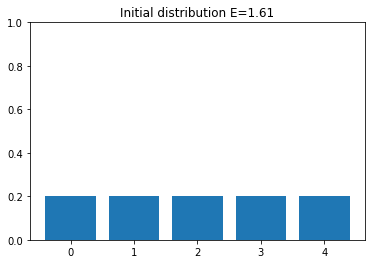

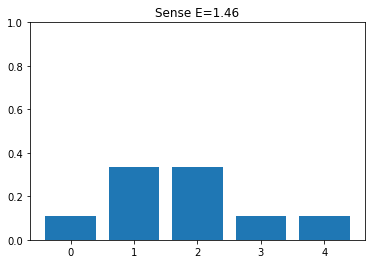

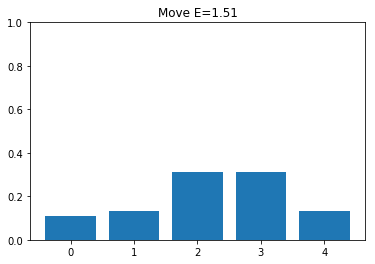

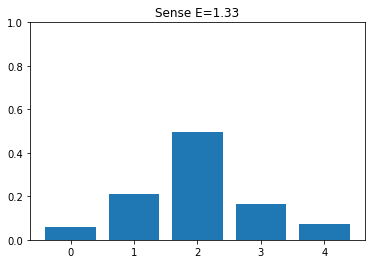

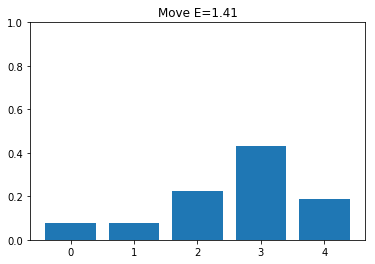

[0.07882352941176472, 0.07529411764705884, 0.22470588235294117, 0.4329411764705882, 0.18823529411764706]


In [54]:
p = get_uniform_dist(5)
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'red']
motions = [1,1]

plot_distribution(p, 'Initial distribution E={:.2f}'.format(calc_entropy(p)))
for i in range(len(measurements)):
    p = sense(p, measurements[i])
    plot_distribution(p, 'Sense E={:.2f}'.format(calc_entropy(p)))
    p = move(p, motions[i])
    plot_distribution(p, 'Move E={:.2f}'.format(calc_entropy(p)))

print(p)         
